In [39]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [40]:
import numpy as np
import pandas as pd

In [41]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [42]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [43]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [44]:
# reflect an existing database into a new model
# automap documentation - https://docs.sqlalchemy.org/en/13/orm/extensions/automap.html
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [45]:
# We can view all of the classes that automap found
tables = Base.classes.keys()
tables

['measurement', 'station']

In [46]:
# Get column names and data types for each table
inspector = inspect(engine)
for table in tables:
    columns = inspector.get_columns(table)
    for c in columns:
        print(c['name'],c['type'], end='   ')
    print()
    print('---------------------------------------')

id INTEGER   station TEXT   date TEXT   prcp FLOAT   tobs FLOAT   
---------------------------------------
id INTEGER   station TEXT   name TEXT   latitude FLOAT   longitude FLOAT   elevation FLOAT   
---------------------------------------


In [47]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [48]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [49]:
# Method to get table columns without inspect
print(Measurement.__table__.columns.keys())
print(Station.__table__.columns.keys())

['id', 'station', 'date', 'prcp', 'tobs']
['id', 'station', 'name', 'latitude', 'longitude', 'elevation']


# Exploratory Climate Analysis

Text(0.5, 1.0, 'Precipitation')

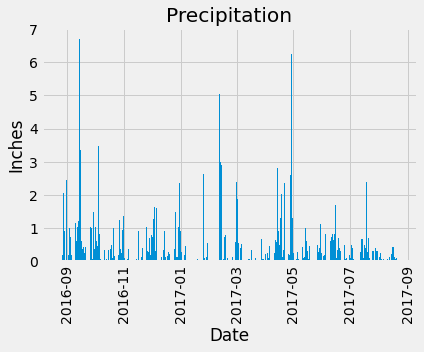

In [120]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
## Get most recent day and convert to datetime object
most_recent_day = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
dt_obj = dt.datetime.strptime(most_recent_day[0], '%Y-%m-%d')
## Subract a year to find datetime object of date from a year earlier of most_recent_day
year_ago = dt.date(dt_obj.year-1,dt_obj.month,dt_obj.day)

# Perform a query to retrieve the date and precipitation scores
last_year_prcp = session.query(Measurement.date,Measurement.prcp).\
                        filter(Measurement.date >= year_ago).all()
# Save the query results as a Pandas DataFrame 
prcp_df = pd.DataFrame(last_year_prcp).dropna()
# Change date data type from string to datetime64[ns]
prcp_df['date'] = pd.to_datetime(prcp_df['date'])
# Set the index to the date column and sort by index
prcp_df = prcp_df.set_index('date').sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
# for reference - https://stackoverflow.com/questions/55584972/showing-only-every-n-dates-on-x-axis-or-grouping-by-month-to-reduce-x-axis-c
plt.figure()
plt.bar(prcp_df.index,prcp_df['prcp'])
plt.xticks(rotation=90)
plt.ylabel('Inches')
plt.xlabel('Date')
plt.title('Precipitation')


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
